<a href="https://colab.research.google.com/github/Supavee/Dog-Detector/blob/main/Dog_Detector_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai import *
from fastai.vision import *
from torchvision.models import * 

import os
import matplotlib.pyplot as plt

In [ ]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.10)


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"kanyakarnthongruk","key":"8099d51fcdcb1b94c2b0b623a5cdec08"}'}

In [ ]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d supavee/dogdog

dogdog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!pip install zip_files

In [ ]:
from zipfile import ZipFile
file_name="dogdog.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
path = Path("/content/Dogs")
path

PosixPath('/content/Dogs')

In [ ]:
path.ls()

[PosixPath('/content/Dogs/test'),
 PosixPath('/content/Dogs/valid'),
 PosixPath('/content/Dogs/train')]

In [ ]:
path_img = path/'train/'

# path_anno
path_img

PosixPath('/content/Dogs/train')

In [ ]:
path_img.ls()

[PosixPath('/content/Dogs/train/05KaoJao'),
 PosixPath('/content/Dogs/train/02Dougie'),
 PosixPath('/content/Dogs/train/01Other'),
 PosixPath('/content/Dogs/train/12Topi'),
 PosixPath('/content/Dogs/train/07Luke'),
 PosixPath('/content/Dogs/train/04Hana'),
 PosixPath('/content/Dogs/train/06Kiara'),
 PosixPath('/content/Dogs/train/10Maya'),
 PosixPath('/content/Dogs/train/08Manny'),
 PosixPath('/content/Dogs/train/11Ninja'),
 PosixPath('/content/Dogs/train/09Maple'),
 PosixPath('/content/Dogs/train/03Finn')]

In [ ]:
tfms = get_transforms()
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=227, num_workers=0).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

In [ ]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=227, num_workers=0, classes=data.classes[:20]).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

In [ ]:
#data.normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

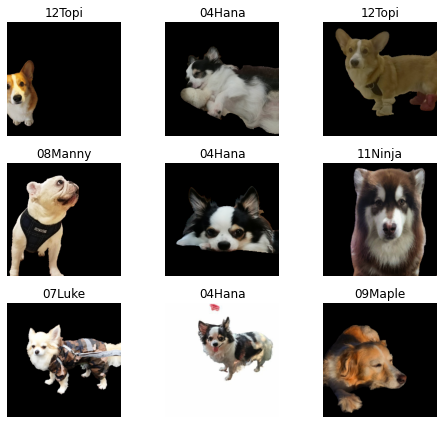

In [ ]:
data.show_batch(rows = 3 ,figsize = (7,6))

In [ ]:
print(data.classes)
len(data.classes), data.c # data.c = for classification problems its number of classes

['01Other', '02Dougie', '03Finn', '04Hana', '05KaoJao', '06Kiara', '07Luke', '08Manny', '09Maple', '10Maya', '11Ninja', '12Topi']


(12, 12)

**Train ResNet34 Model**


In [ ]:
learn = create_cnn(data , models.resnet34, metrics = accuracy) 

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.170282,0.110509,0.972603,05:43
1,1.045259,0.033010,0.981735,05:38
2,0.633151,0.025466,0.986301,05:38
3,0.431909,0.024175,0.986301,05:39


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

In [ ]:
learn.model_dir = "/content/"
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


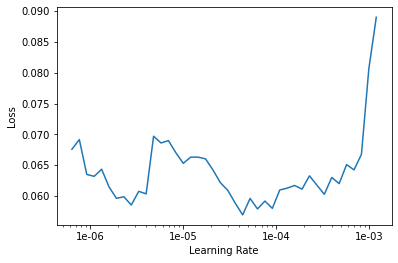

In [ ]:
learn.recorder.plot()

In [ ]:
learn.metrics=[accuracy,
               Precision(),
               Recall()]

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(3e-6,3e-5))

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,0.056007,0.021787,0.990868,0.993333,0.990656,08:30
1,0.055840,0.016159,0.990868,0.993333,0.990656,08:25
2,0.060922,0.014983,0.995434,0.996667,0.996212,08:28
3,0.054736,0.014369,0.995434,0.996667,0.996212,08:24


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

In [ ]:
learn.model_dir = "/content/"
learn.save('stage-2')

In [ ]:
learn.load('stage-2');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

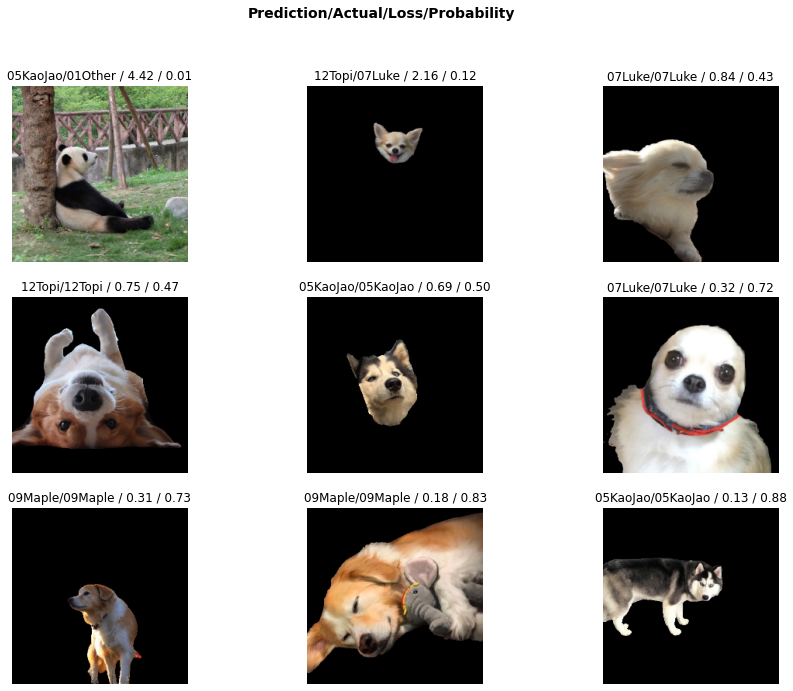

In [ ]:
interp.plot_top_losses(9 , figsize = (15,11))

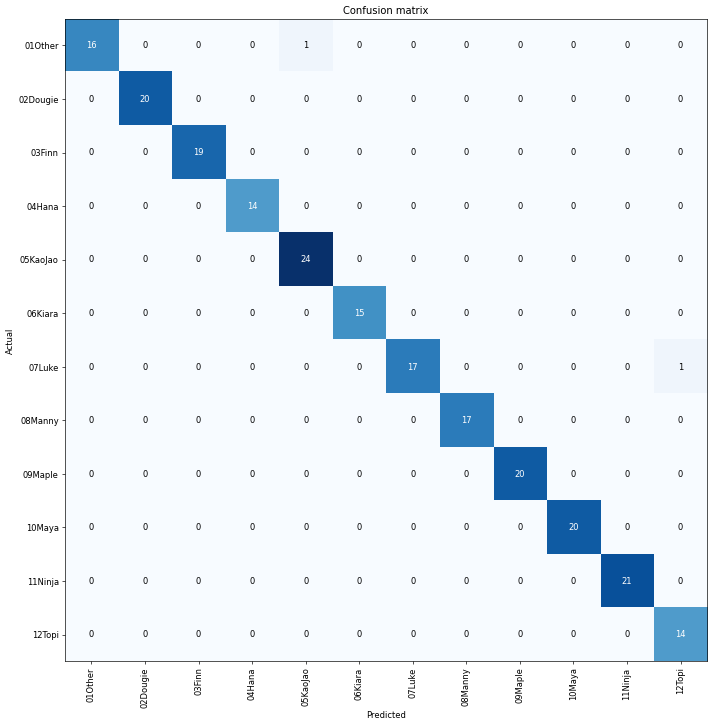

In [ ]:
interp.plot_confusion_matrix(figsize = (12,12), dpi = 60)

In [ ]:
interp.most_confused(min_val=1) # useful tool

[('01Other', '05KaoJao', 1), ('07Luke', '12Topi', 1)]

In [ ]:
data.classes

['01Other',
 '02Dougie',
 '03Finn',
 '04Hana',
 '05KaoJao',
 '06Kiara',
 '07Luke',
 '08Manny',
 '09Maple',
 '10Maya',
 '11Ninja',
 '12Topi']

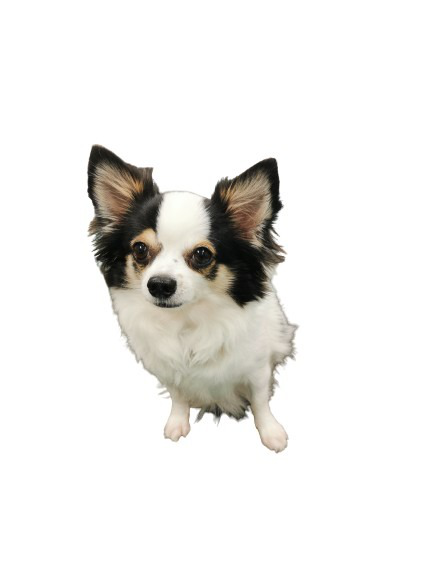

In [ ]:
img = open_image('/content/Dogs/test/04Hana/IMG_20200118_162355.jpg')
img

In [ ]:
classes = data.classes
data2 = ImageDataBunch.single_from_classes(path, classes, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2 , models.resnet34)
learn.load('/content/stage-2')

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/Dogs;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/Dogs;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class
pred_idx
outputs

tensor([6.7233e-05, 4.9992e-07, 1.2110e-06, 9.9963e-01, 7.1170e-10, 1.4875e-06,
        3.0385e-04, 5.3553e-08, 2.6324e-08, 1.0395e-07, 6.7132e-08, 1.7779e-07])

In [ ]:
data.classes

['01Other',
 '02Dougie',
 '03Finn',
 '04Hana',
 '05KaoJao',
 '06Kiara',
 '07Luke',
 '08Manny',
 '09Maple',
 '10Maya',
 '11Ninja',
 '12Topi']

In [ ]:
prediction = str(pred_class)
prediction[10:]
print("The predicted breed is " + prediction[:10] + '.')

The predicted breed is 04Hana.


In [ ]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')
learn.metrics=[accuracy, Fbeta_binary(beta2=1,clas = 1)]

NameError: ignored